<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Анализ-окупаемости-рекламмы" data-toc-modified-id="Анализ-окупаемости-рекламмы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ окупаемости рекламмы</a></span><ul class="toc-item"><li><span><a href="#Графики-LTV-и-ROI,-а-также-графики-динамики-LTV,-CAC-и-ROI" data-toc-modified-id="Графики-LTV-и-ROI,-а-также-графики-динамики-LTV,-CAC-и-ROI-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Графики LTV и ROI, а также графики динамики LTV, CAC и ROI</a></span></li><li><span><a href="#Графики-конверсии-и-удержания" data-toc-modified-id="Графики-конверсии-и-удержания-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Графики конверсии и удержания</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Анализ убытков приложения ProcrastinatePro+

Развлекательное приложение ProcrastinatePro+, следуя плану успешного развития бизнеса, потратило значительные средства на рекламу. 

Однако, несмотря на огромные вложения, последние несколько месяцев компания терпит убытки.

Наша задача разобраться в причинах и помочь компании выйти в плюс.

Для исследования предоставлены данные о пользователях, с датой привлечения с 1 мая по 27 октября 2019 года:
 - лог сервера с данными о посещениях
 - выгрузка покупок за период
 - рекламные расходы
 
**Цель работы**  выявить причину низкой окупаемости рекламы

Для этого мы изучим:

 - откуда приходят пользователи и какими устройствами они пользуются
 - сколько стоит привленчение пользователей из различных рекламных каналов
 - сколько денег приносит каждый клиент
 - когда расходы на привлечение клиента окупаются
 - какие факторы мешают привлечению клиентов
 
*Исследование пройдет по следующим этапам*

   - обзор данных, подготовка данных к анализу
   - исследовательский анализ данных
   - исследование маркетинговых расходов
 

## Изучение общей информации

- Загрузим необходимые библиотеки. Прочитаем файлы и сохраним их в переменные. Опишем данные.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
orders = pd.read_csv('/datasets/orders_info_short.csv')

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
ad_costs = pd.read_csv('/datasets/costs_info_short.csv')

In [7]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Комментарий

 - Количество значений в столбцах  одинаковое, пропуков в данных нет
 - Приведем названия колонок к нижнему регистру. Пробелы заменим на нижнее подчеркивание
 - Изменим тип данных. Преобразуем данные о времени
 - Сделаем проверку на дубликаты
 


In [8]:
visits.columns = visits.columns.str.replace(' ', '_').str.lower() # изменим названия столбцов
visits['session_start'] = pd.to_datetime(visits['session_start']) # изменим тип данных
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [9]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [10]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [11]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [12]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [13]:
visits.duplicated().sum()

0

In [14]:
orders.columns = orders.columns.str.replace(' ', '_').str.lower() # изменим названия столбцов
orders['event_dt'] = pd.to_datetime(orders['event_dt'])  # изменим тип данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [15]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [16]:
orders.duplicated().sum()

0

In [17]:
ad_costs.columns = ad_costs.columns.str.lower()   # изменим названия столбцов
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date  # изменим тип данных
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [18]:
ad_costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [19]:
ad_costs['channel'].value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

In [20]:
ad_costs.duplicated().sum()

0

### Вывод

Мы изучили предоставленные таблицы:
 - информацио о сессиях пользователей
 - информацию о заказах
 - информацию о тратах на рекламу
 
Во всех таблицах количество строк в колонках одинаковое, значит в данных нет пропусков

Исправили названия колонок:
 - Заменим прописные буквы на строчные. 
 - Пробелы заменим на нижнее подчеркивание
 
Изменили тип данных. Преобразовали данные о времени для дальнейших расчетов

Проверили описание данных методом `value_counts()` в колонках с названием устройств, каналов привлечения и регионов. Аномалий в названиях не выявли.

Дубликатов не выявили

## Анализ данных

**Зададим функции для создания профилей, расчета  LTV, ROI, удержания и конверсии**


In [21]:
events = None # других событий нет

In [22]:
# функция для создания пользовательских профилей
# сортируем сессии по ID пользователя и дате привлечения
# группируем по ID и находим параметры первых посещений
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
   
    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
           # считаем количество уникальных пользователей
           # с одинаковым источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    # объединяем траты на рекламу и число привлеченных пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлеченных пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    # стоимость привлечения органических пользователей равна 0
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [24]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

- Создадим пользовательские профили. Определим минимальную и максимальную дату привлечения пользователей

In [26]:
profiles = get_profiles(visits, orders, events, ad_costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [27]:
min_date = profiles['dt'].min() 
max_date = profiles['dt'].max()

print('Минимальная дата привлечения', min_date)
print('Максимальная дата привлечения', max_date)


Минимальная дата привлечения 2019-05-01
Максимальная дата привлечения 2019-10-27


Комментарий

Даты соответствуют заявленным в задании

 - Узнаем, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны

In [28]:
profiles.groupby('region').agg({'user_id': 'nunique', 'payer' : 'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


 - Выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства

In [29]:
profiles.groupby('device').agg({'user_id': 'nunique', 'payer' : 'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


 - Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения

In [30]:
profiles.groupby('channel').agg({'user_id': 'nunique', 'payer' : 'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


Комментарий

 - По странам - больше всего любят развлекаться и готовы за это платить в  `United States`. Страна `Germany` пусть не самая многочисленная по пользователям, зато на втором месте по количеству платящих пользователей. Наверно, стоит привлекать большее число клиентов в этом регионе. Страны `UK и France` делят два последних места, они примерно одинаковы по числу пользователей, но готовых заплатить больше в UK
 

 - По устройствам - пользователи `Mac` самые платящие клиенты. Жаль, что не самые многочисленные. Возможно, при проведении рекламных компаний, нужно обратить внимание на владельцев Mac. Самое большое число клиентов пользователи устройства `iPhone`. По количеству платящих они на втором месте. В целом, можно сказать, что пользователи всех устройств конвертируются стабильно.
 
 
 - По каналам - самая большая доля платящих пользователей приходит через канал `FaceBoom`, он же второй по численности после источника organic. В organic доля платящих самая низкая, зато 100% окупаемость, на их привлечение денег не потраченно. Второе и третье место по количеству платящих занимают каналы `AdNonSense и lambdaMediaAds`, а вот по числу клиентов они занимают последние места. Стоит обратить внимание на эти каналы при распределение рекламных показов. На четвертом месте по платящим пользователям канал `TipTop`, по числу пользователей на третьем. Два предпоследних места по доле платящих занимают каналы `OppleCreativeMedia и LeapBob`, хотя пользователей из этих каналов приходит много, число готовых заплатить минимально
 
 
 - Хорошо сделанная реклама приводит много платящих пользователей, но чтобы реклама окупалась, необходимо учитывать и стоимость проведения рекламных акций для каждого источника

## Маркетинг

 - Посчитаем общую сумму расходов на маркетинг. 
 - Выясним, как траты распределены по источникам
 - Узнаем сколько в среднем стоило привлечение одного пользователя для каждого источника трафика, и для всего проекта
 - Визуализируем изменение метрик во времени

In [31]:
print('Общая сумма расходов на маркетинг: {:.1f}$'.format(profiles['acquisition_cost'].sum()))

Общая сумма расходов на маркетинг: 105497.3$


In [32]:
profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost', ascending=False) 

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Комментарий

На популярные каналы тратится больше средств

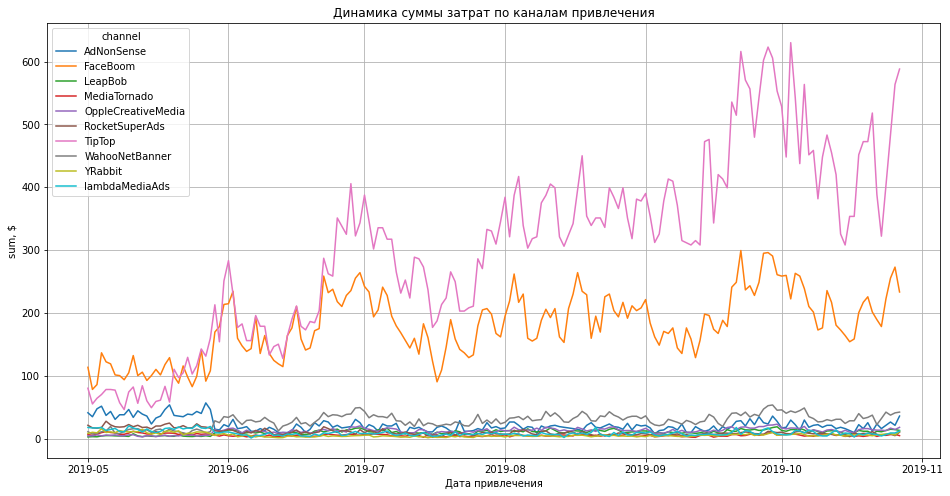

In [33]:
profiles.query('channel not in "organic"').pivot_table(  #строим график истории изменения суммы затрат по каналам привлечения
    index='dt', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(16, 8))
plt.ylabel('sum, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика суммы затрат по каналам привлечения')
plt.show()

Комментарий

Самые дорогие каналы `TipTop` и `FaceBoom`

Рекламные расходы на канал `FaceBoom` находятся, примерно, на одним уровне на протяжении всего периода
Равномерность трат характерна и для остальных каналов привлечения

Сумма затрат на рекламу в канале  `TipTop` увеличивается

 - Посчитаем стоимость привлечения на одного полльзователя по каналам

In [34]:
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False) #стоимость одного пользователя по каналам

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [35]:
print('Стоимость привлечения пользователя без канала organic: {:.2f} $'\
      .format(profiles.query('channel not in "organic"')['acquisition_cost'].mean()))

Стоимость привлечения пользователя без канала organic: 1.13 $


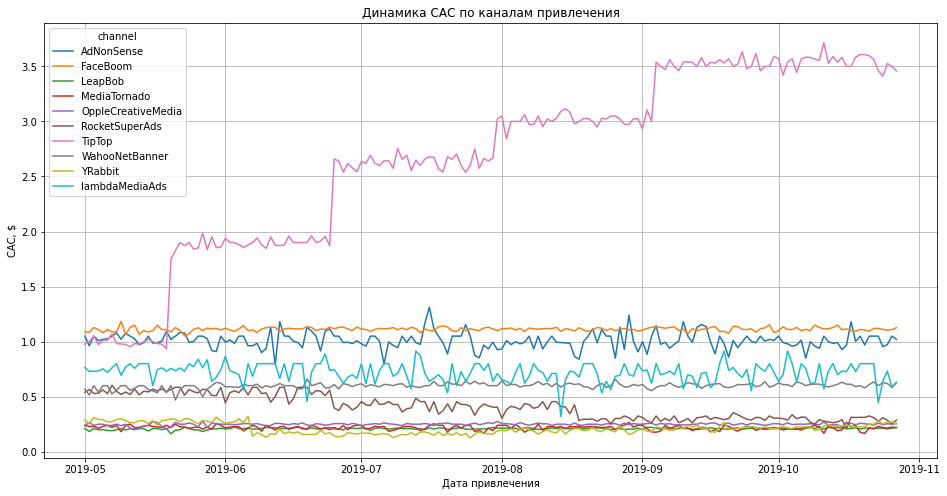

In [36]:
profiles.query('channel not in "organic"').pivot_table(  #строим график истории изменения САС по каналам привлечения
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(16, 8))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Комментарий

Стоимость привлечения в канале `TipTop` неуклонно растет и задает общий характер удорожания расходов на рекламму. Хотя в остальных каналах рекламные расходы стабильно ровные. Канал `FaceBoom` стоит на первом месте по привлечению платящих пользователей, а стоимость привлечения почти в 3 раза ниже, чем в `TipTop`, который на четвертом. Источники `AdNonSense и lambdaMediaAds` также в тройке лидеров по привлечению платящих клиентов, стоимость привлечения ниже в 3 и в 4 раза, чем `TipTop`


## Анализ окупаемости рекламмы

###  Графики LTV и ROI, а также графики динамики LTV, CAC и ROI

- Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI
- Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по рекламным каналам, странам и устройствам
- Построим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам

In [37]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [38]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(22, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

- Установим момент и горизонт анализа. Будем считать, что на календаре 1 ноября 2019 года. В бизнес-плане заложено, что пользователи должы окупаться не позднее чем через две недели после привлечения.

In [39]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [40]:
profiles_organic_less = profiles.query('channel not in "organic"') # исключим органических пользователей

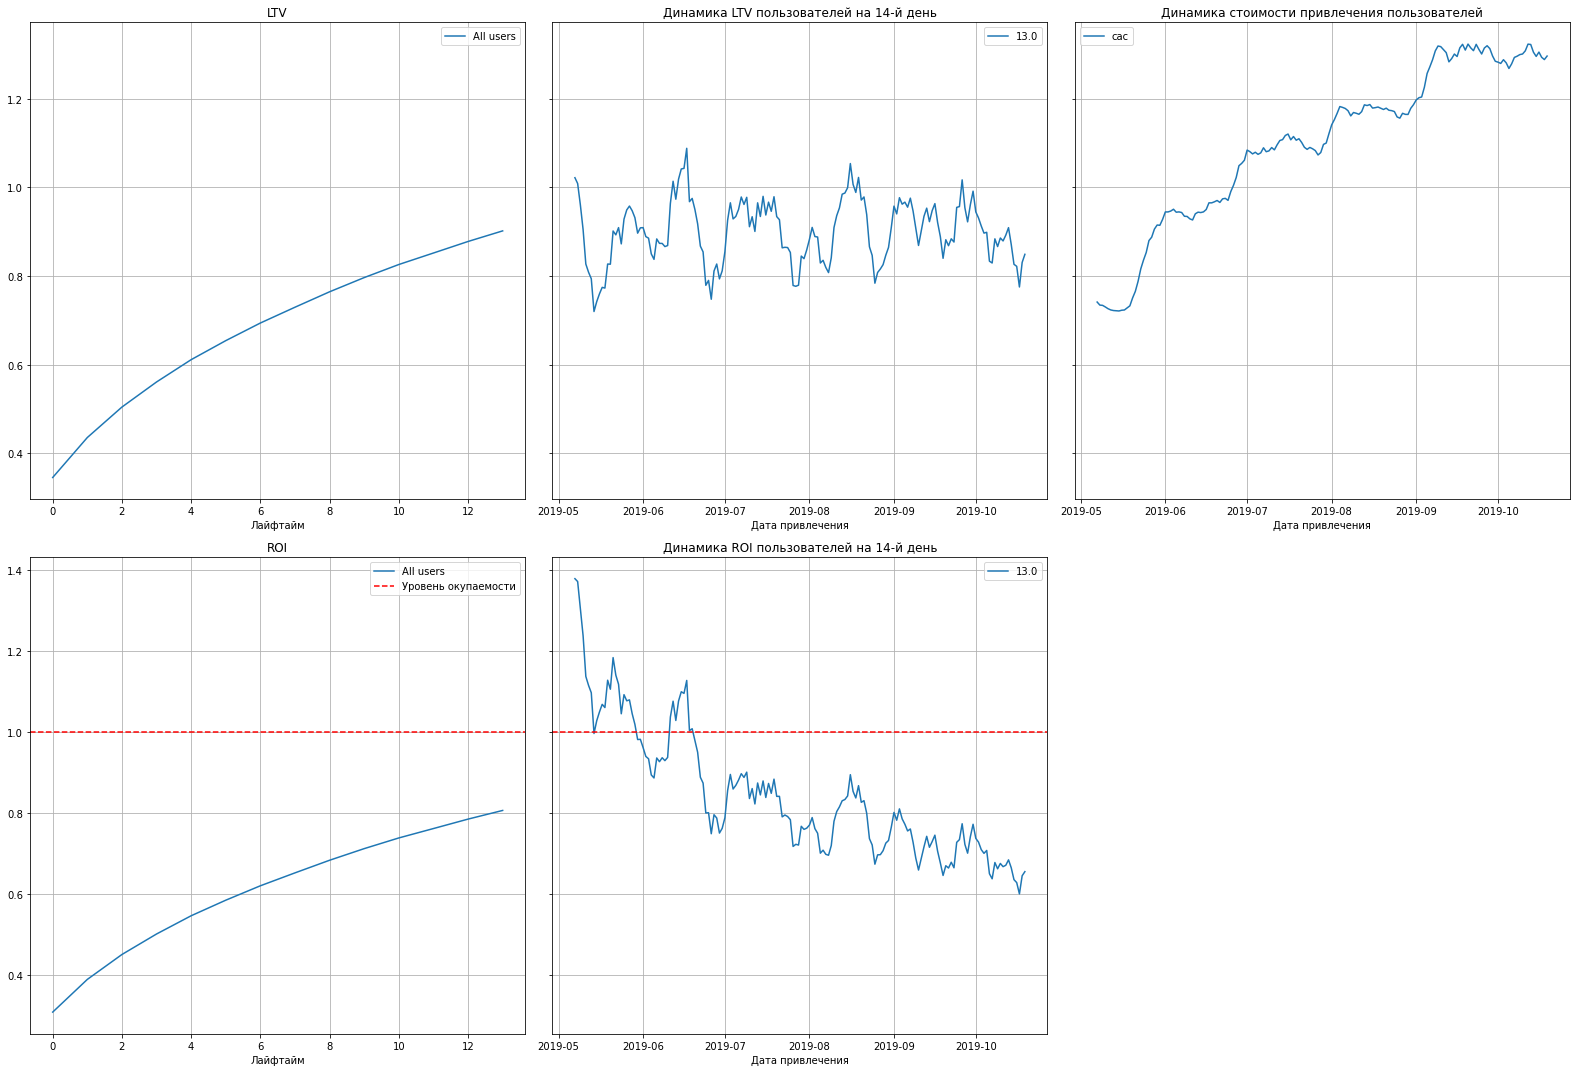

In [41]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_organic_less, orders, observation_date, horizon_days)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Комментарий

- Реклама окупается, примерно, на 80 процентов и причина очевидна - увеличение рекламных расходов
- На LTV влияет сезонный фактор, но этот показатель достаточно стабилен
- и если в  начале исследуемого периода окупемость имеет место быть, но уже через месяц, с увеличением стоимости, рекламма перестает окупаться.
- Ранее мы выявили резкое увеличение стоимости рекламмы в канале `TipTop`
- Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по рекламным каналам

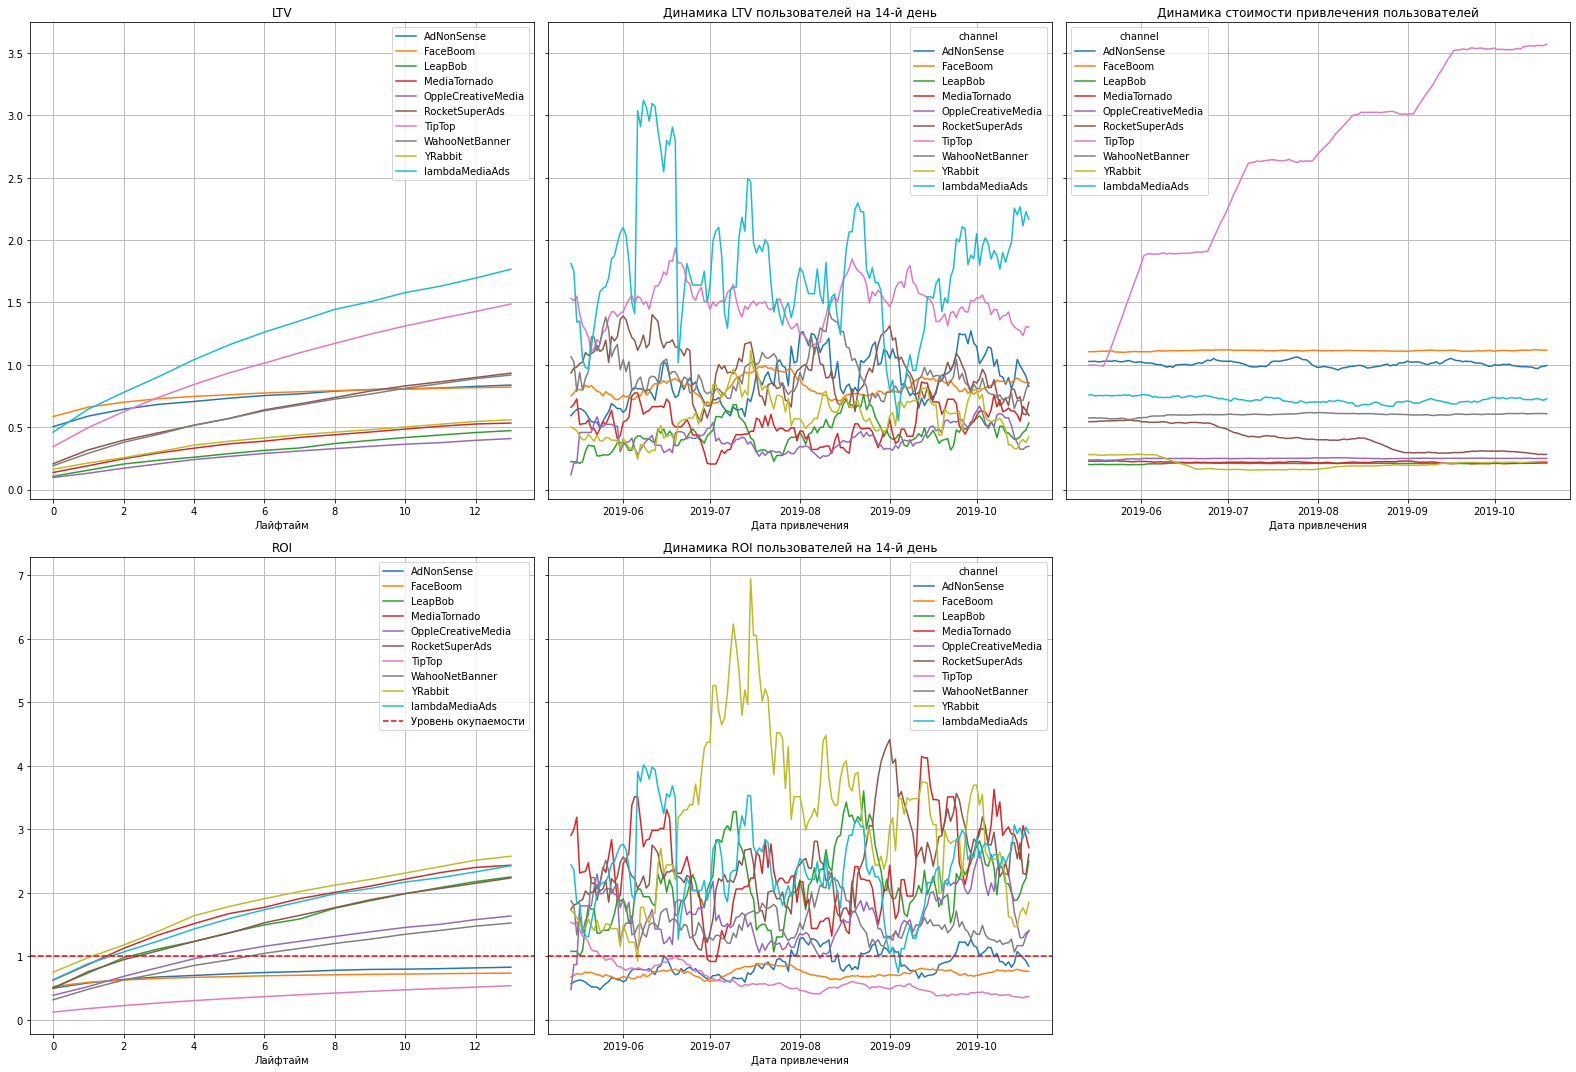

In [42]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_organic_less, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Комментарий

- На каналах - лидерах привлечения платных пользователей  `FaceBoom` `TipTop` и  `AdNonSense` реклама не окупается. Для `TipTop` понятна причина, высокая стоимость рекламы. Для `FaceBoom` и `AdNonSense` нужно искать причину.
- Реклама в остальных каналах преодолела порог окупаемости. Лучше всего окупаются `YRabbit` и `MediaTornado` и `lambdaMediaAds`
 
 
Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по странам

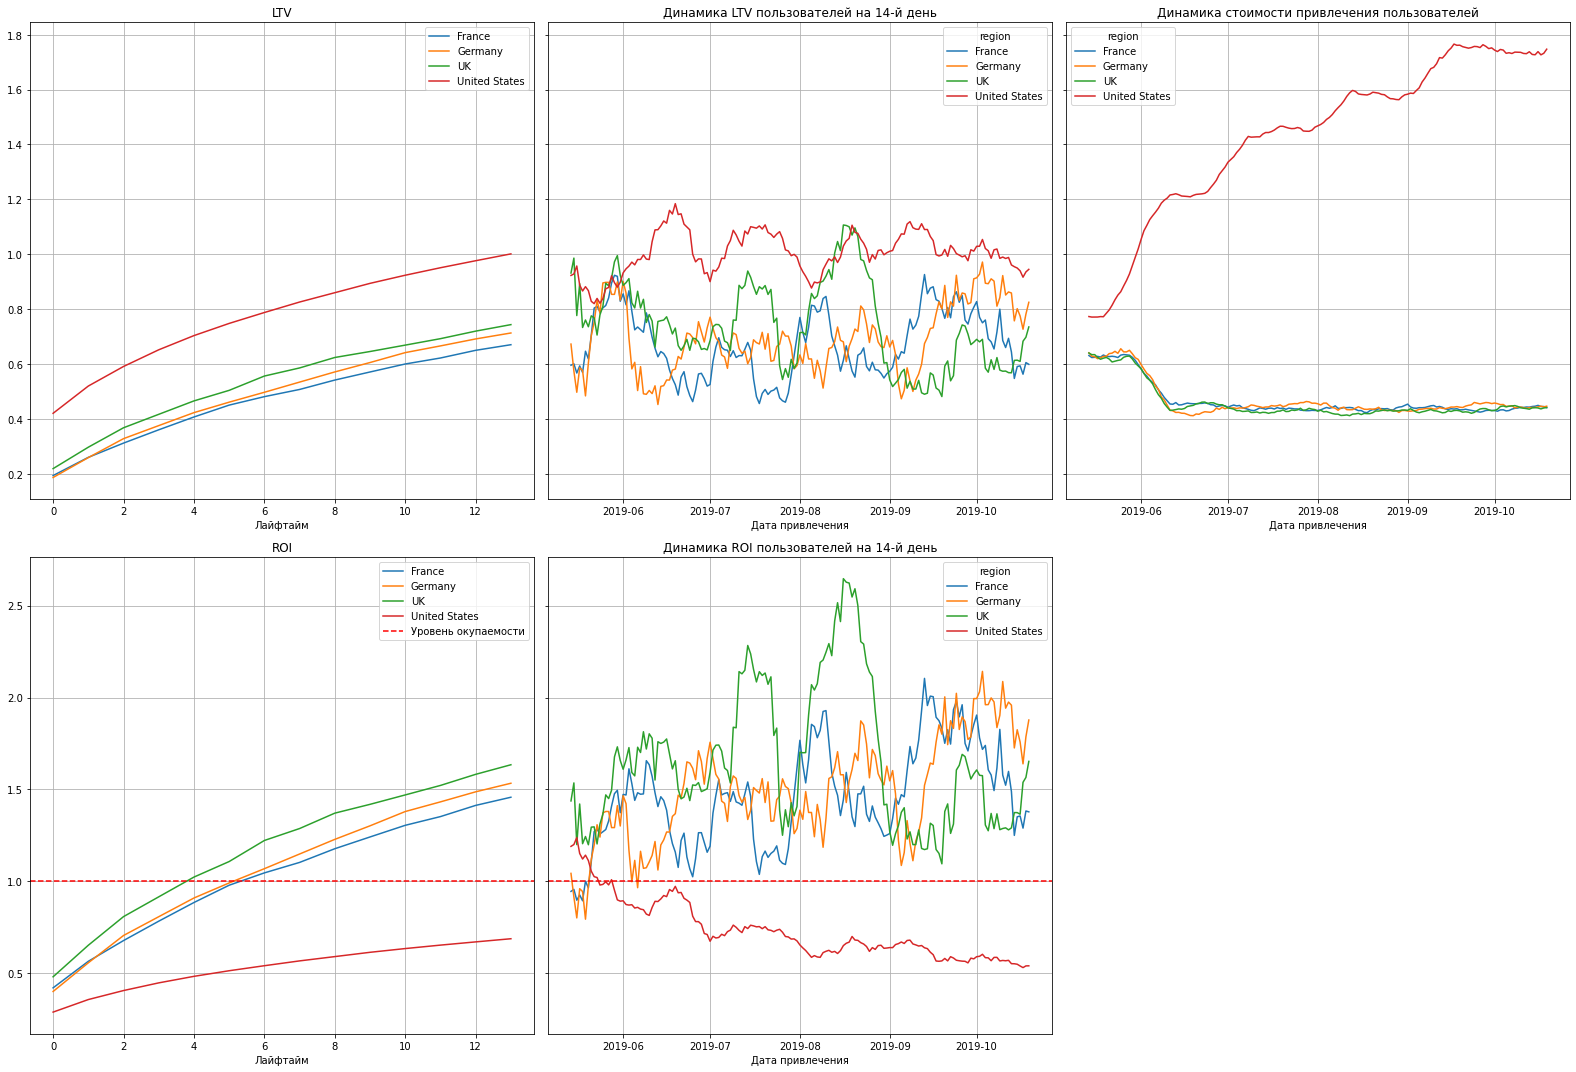

In [43]:
# смотрим окупаемость с разбивкой по регионам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_organic_less, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Комментарий

- Реклама окупается во всех регионах, за исключением `United States`. Хотя, по росту LTV это этот регион первый. Расходы на рекламу растут несозмеримо быстрее доходов.
- График удорожания рекламы в канале `TipTop` и регионе `United States` одинаковый. 

In [44]:
profiles_organic_less_us = profiles.query('channel not in "organic" and region == "United States"')
profiles_organic_less_eu = profiles.query('channel not in "organic" and region not in "United States"')
# сделали срез для региона United States
# сделали срез для европейского региона

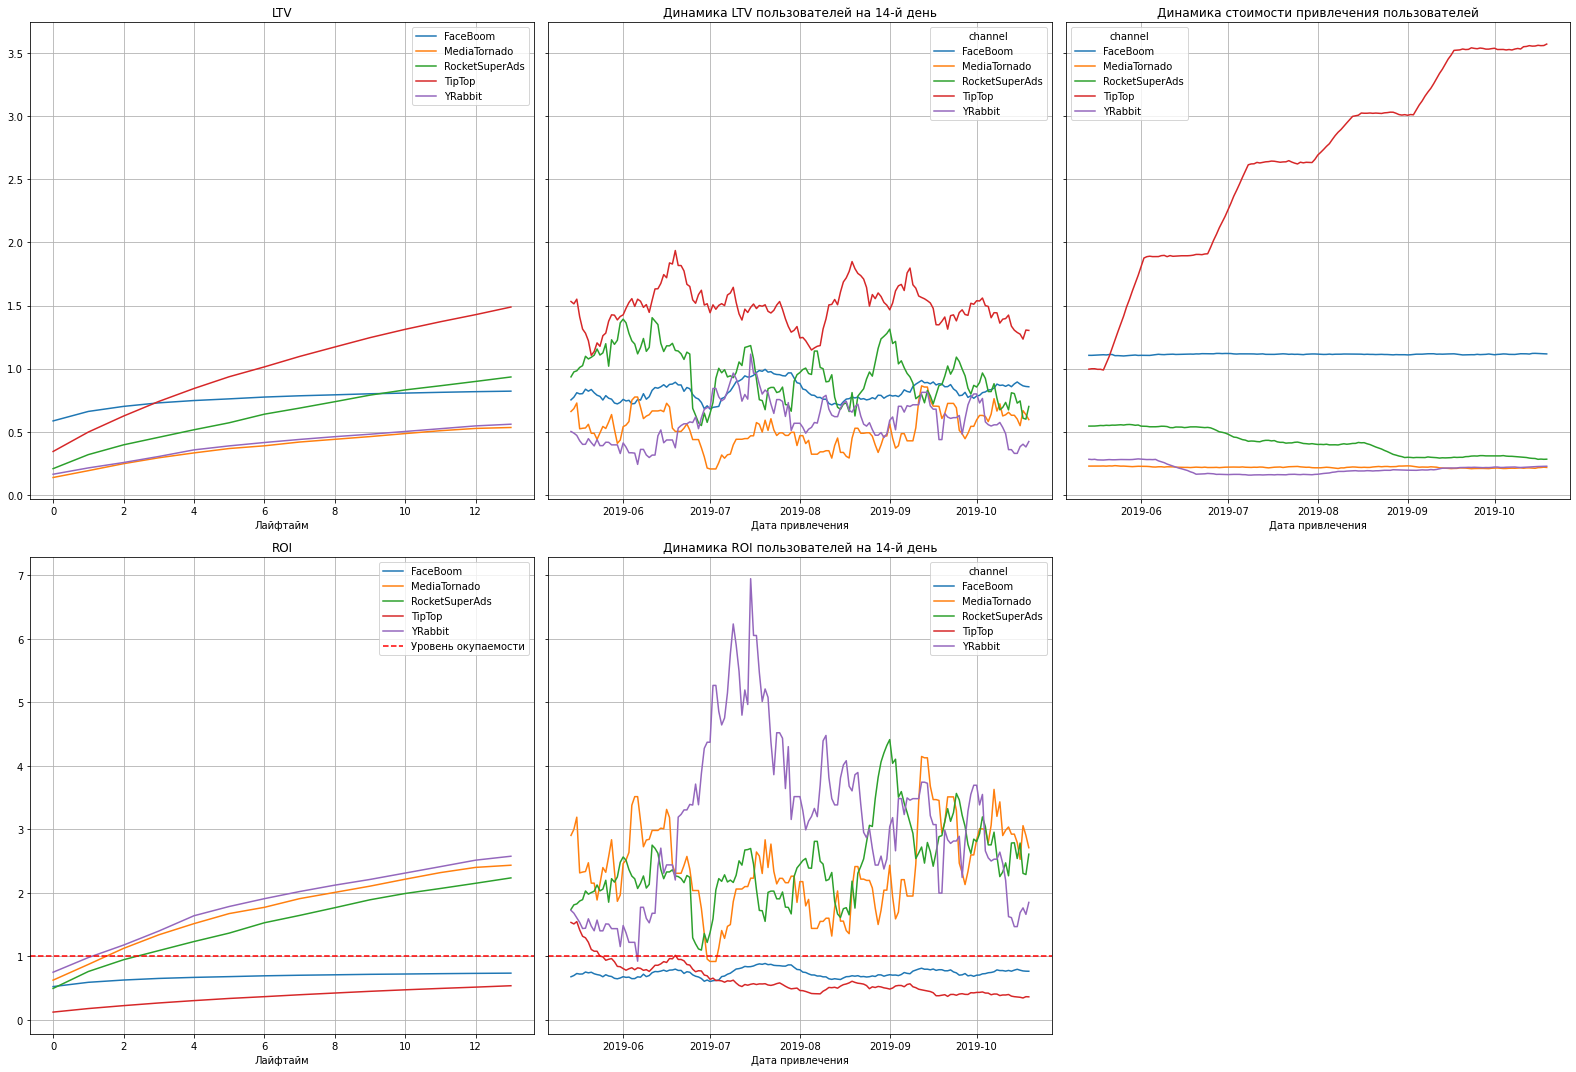

In [45]:
# смотрим окупаемость с разбивкой по источникам привлечения для региона United States

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_organic_less_us, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

In [46]:
profiles_organic_less_us['channel'].value_counts()

FaceBoom          29144
TipTop            19561
RocketSuperAds     4448
MediaTornado       4364
YRabbit            4312
Name: channel, dtype: int64

Комментарий

В регионе `United States` реклама размещена в пяти каналах.
Доход выше всего от канала `TipTop`. И все же он не окупается из за высоких издержек
`FaceBoom` не окупается, при стабильном САС

Число переходов через источники `RocketSuperAds, MediaTornado, YRabbit`, значительно меньше, чем в `TipTop и FaceBoom`, но реклама в этих каналах окупается

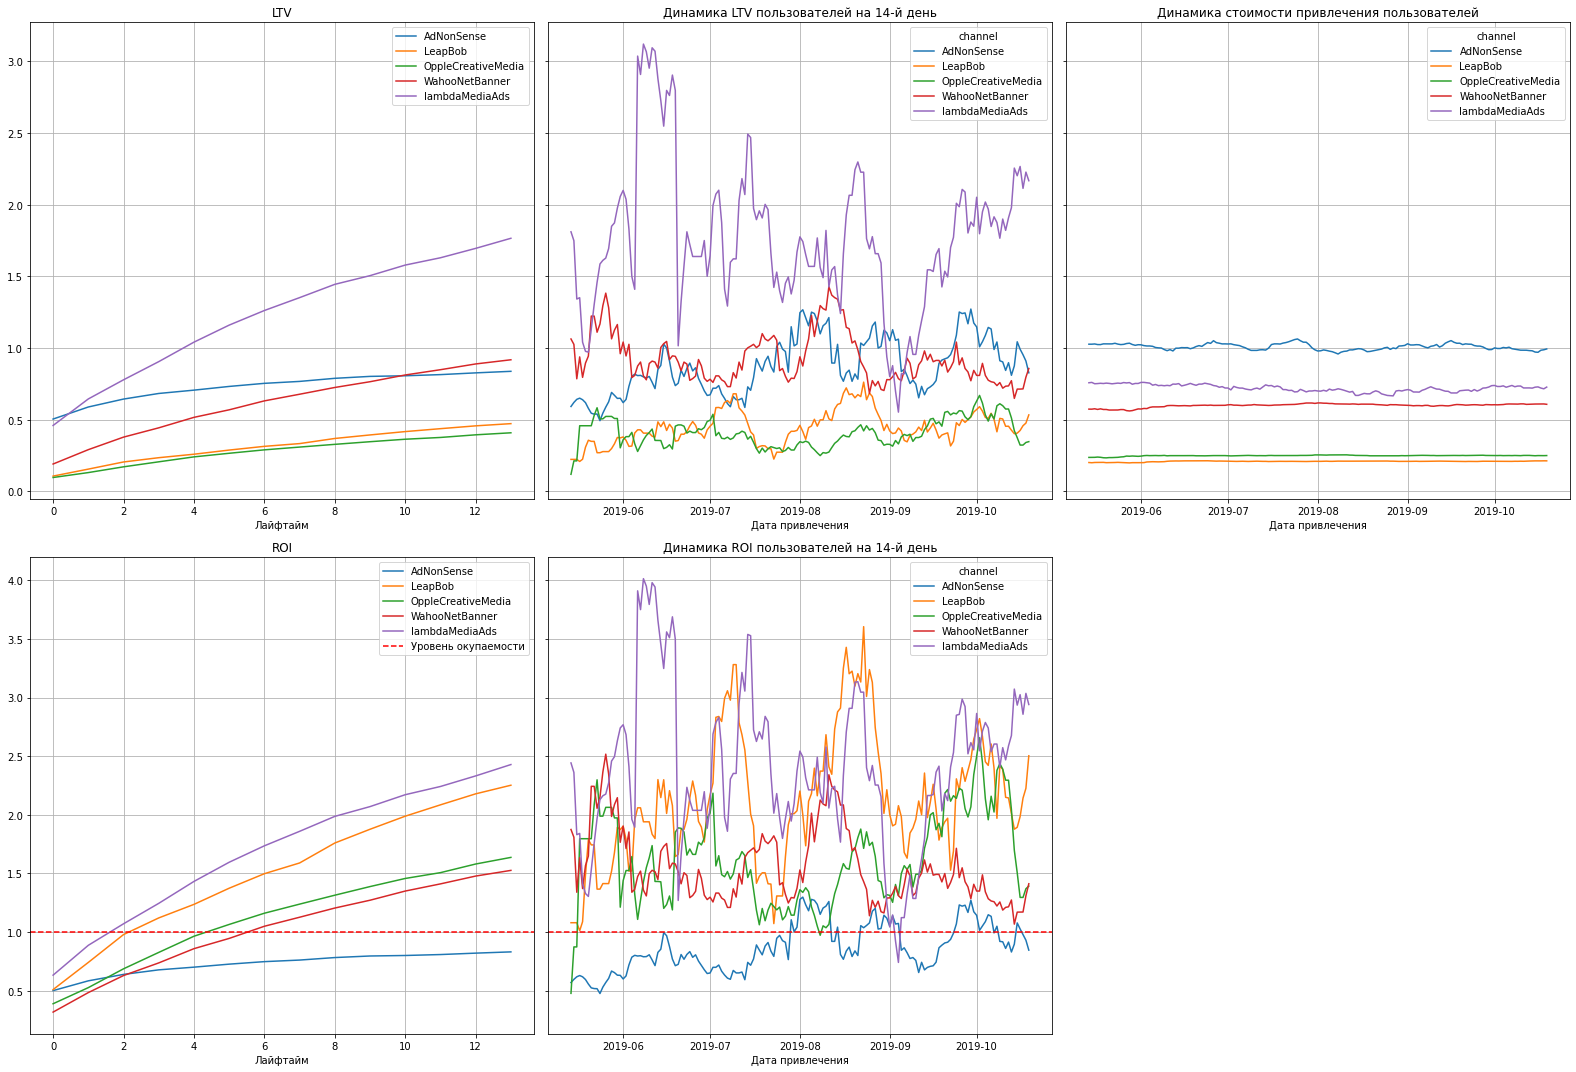

In [47]:
# смотрим окупаемость с разбивкой по источникам привлечения для европейского региона

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_organic_less_eu, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Комментарий

Европейский регион отличается от американского стабильность трат на рекламу. Самый дорогой канал по затратам `AdNonSense`, но он убыточный, реклама в нем не окупается

Самый выгодный канал для размещения рекламы `lambdaMediaAds`
Источники `LeapBob, OppleCreativeMedia, WahooNetBanner` тоже хорошо окупаются и через них приходит большое число пользователей

In [48]:
profiles_organic_less_eu['channel'].value_counts()

OppleCreativeMedia    8605
LeapBob               8553
WahooNetBanner        8553
AdNonSense            3880
lambdaMediaAds        2149
Name: channel, dtype: int64

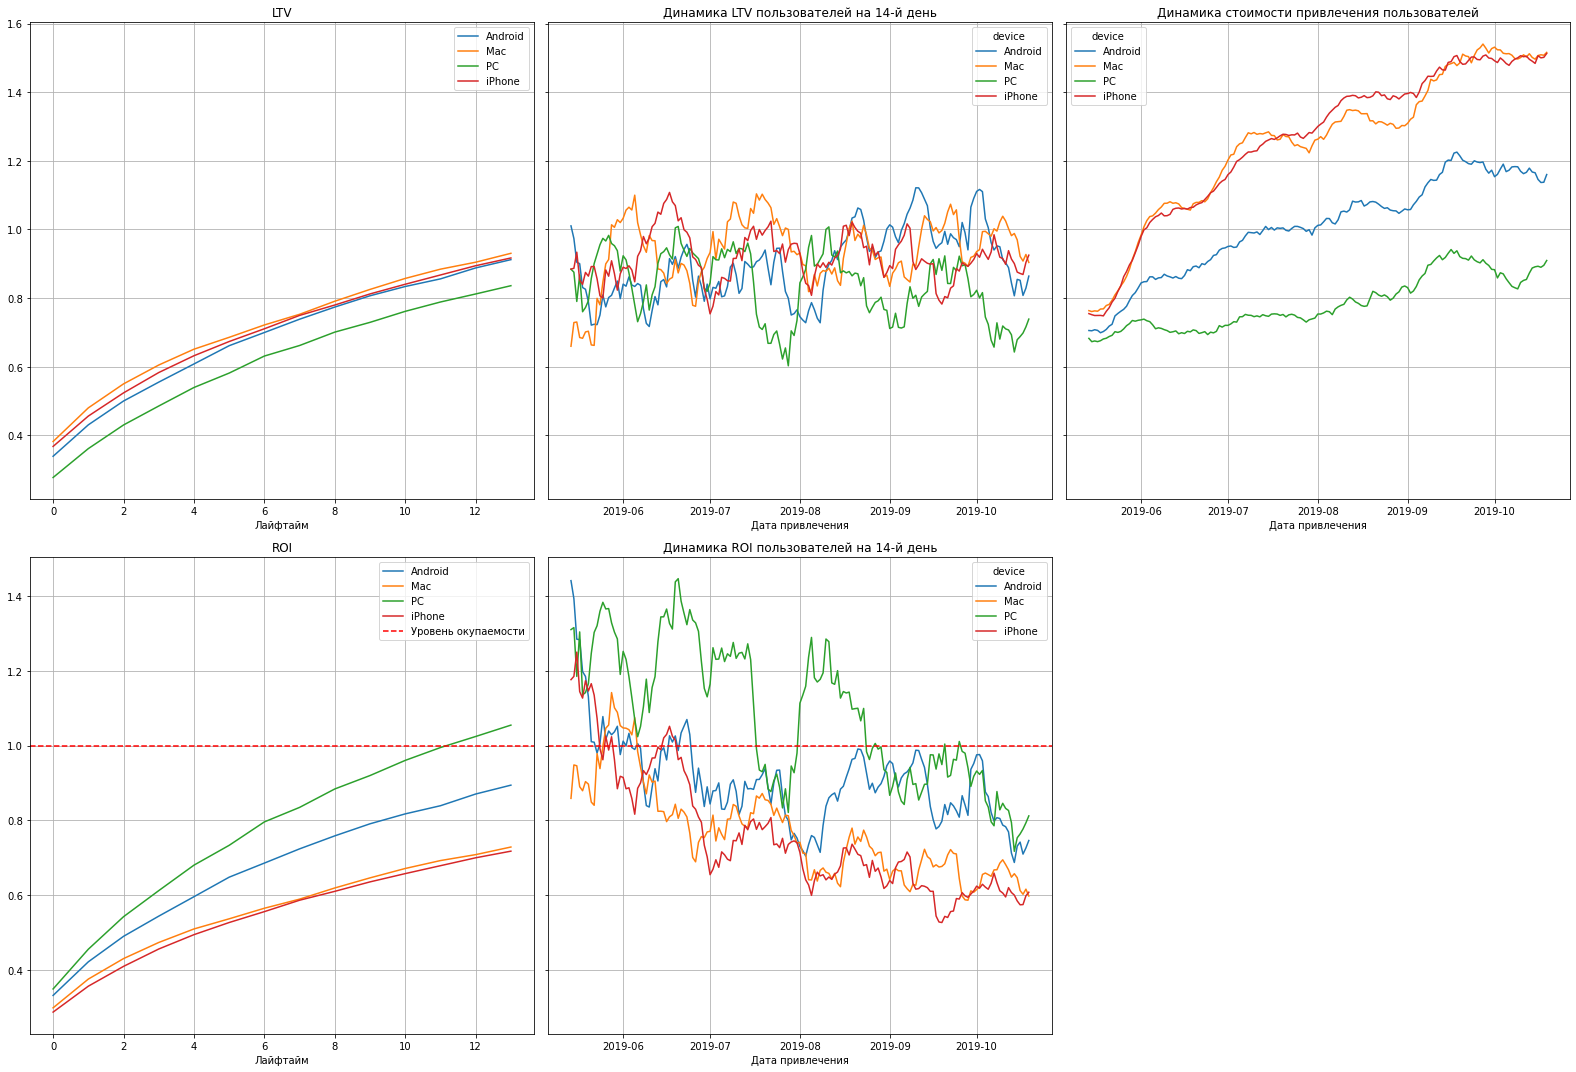

In [49]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_organic_less, orders, observation_date, horizon_days, dimensions=dimensions
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Комментарий

- Картина одна для всех устройств LTV стабилен. CAC растет,  ROI снижается. Преодолеть порог окупаемости смог только РС. Причина, скорее всего количество рекламы убыточных каналов.

- Осталось выяснить почемы реклама не окупается на каналах `FaceBoom` и `AdNonSense` при ровном САС


 - Построим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам

### Графики конверсии и удержания

In [50]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(18, 8))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

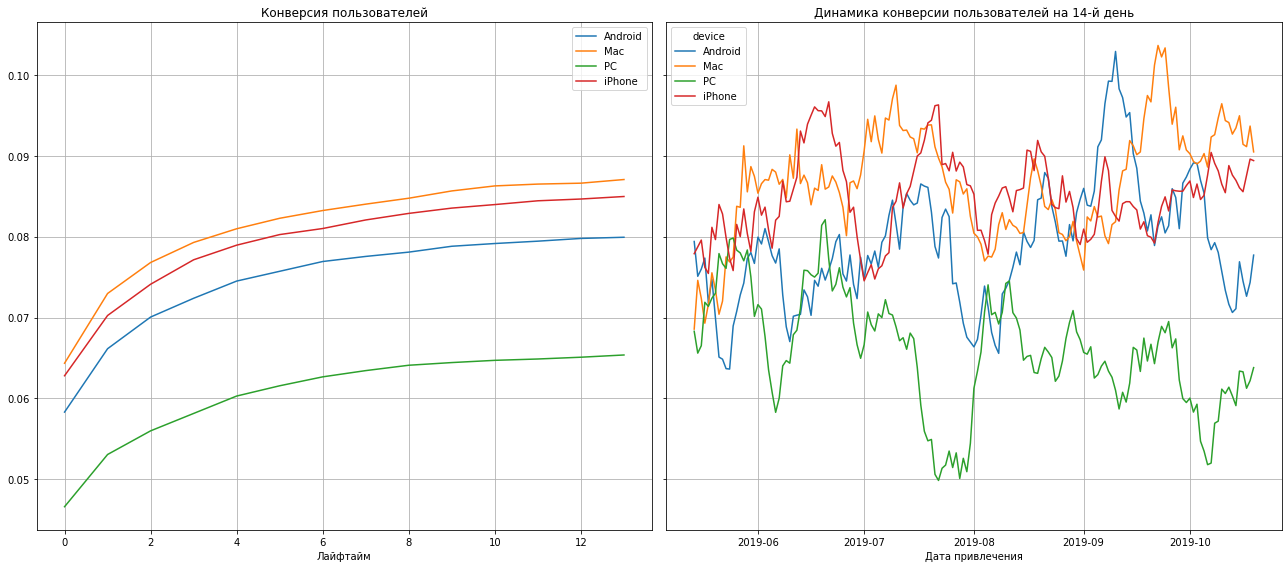

In [51]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_organic_less, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

Комментарий

Пользователи устройства `Mac` конвертируются лучше всех. `iPhone` и `Android` немного отстают. 
И все же это тройка лидеров. Владельцы `PC` значительно реже склоняются к платной версии

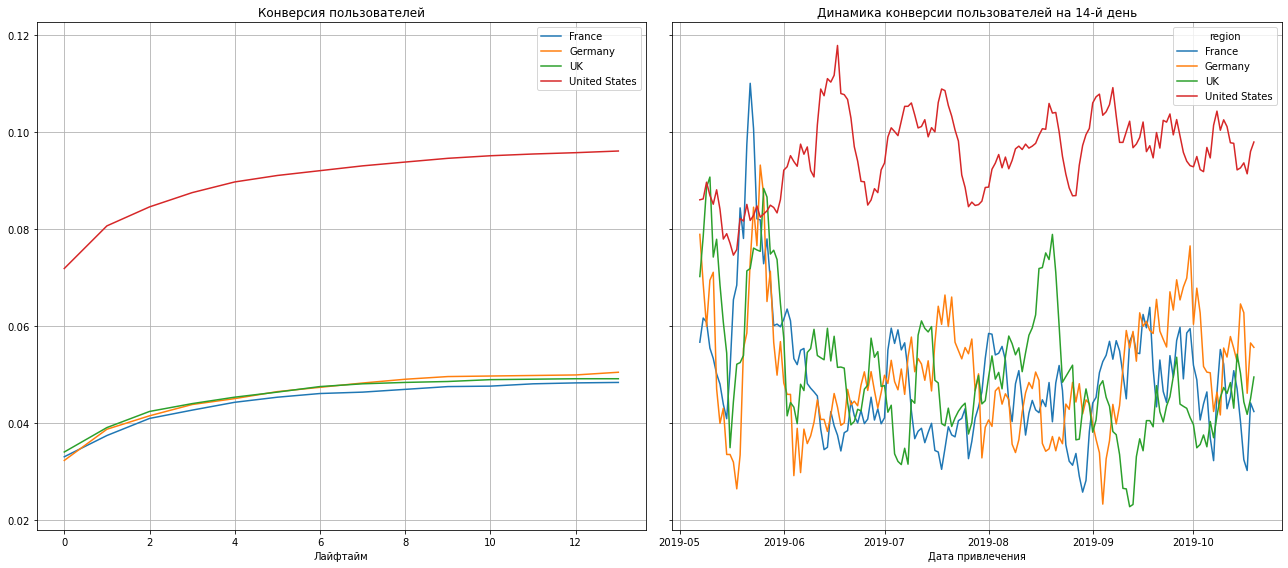

In [52]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_organic_less, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Комментарий

Американский континент конвертируется значительно лучше европейского. Страны `Germany, France, UK` по уровню конверсии очень близки.
По стабильности конверсии все страны приблизительно одинаковы.

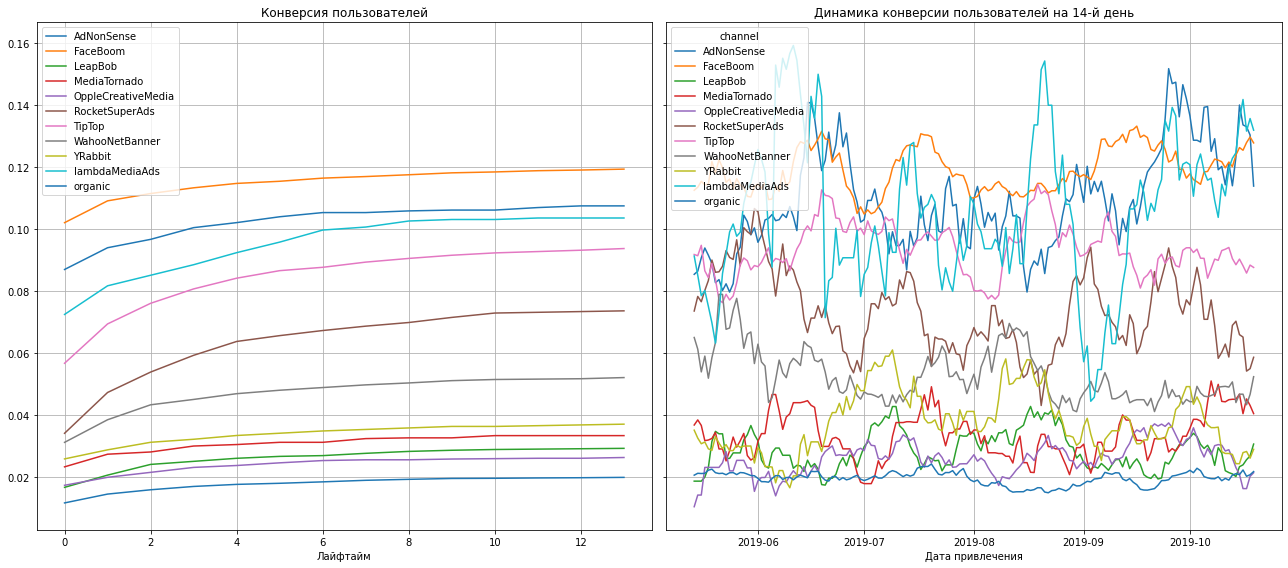

In [53]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

Комментарий

 - Ранее мы установили, что пользователи каналов `FaceBoom` и `AdNonSense` хорошо конвертируются. Почему все таки не окупается реклама на этих источниках. Изучим графики удержания. Построим с разбивкой по устройствам, регионам и каналам привлечения

In [54]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 15))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

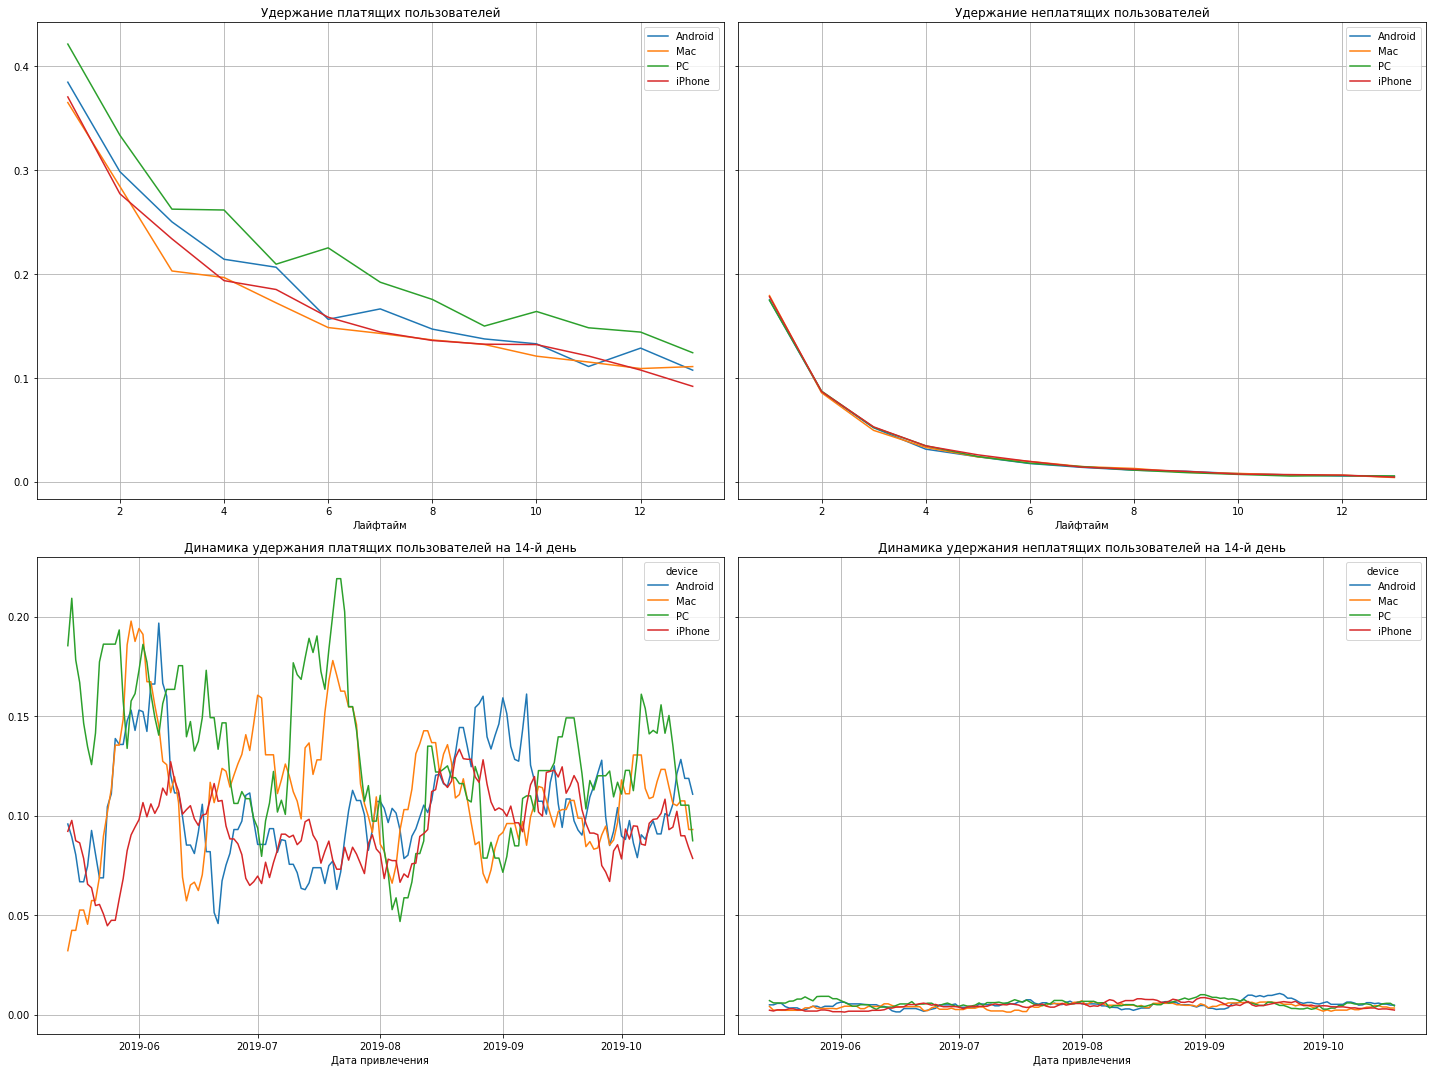

In [55]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_organic_less, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14) 

Комментарий

- Заметен такой эффект, чем лучше конвертируются пользователи устройства, тем хуже удерживаются. Разница не большая, но очевидная. В общей картине, удержание для всех устройств примерно одинаковое

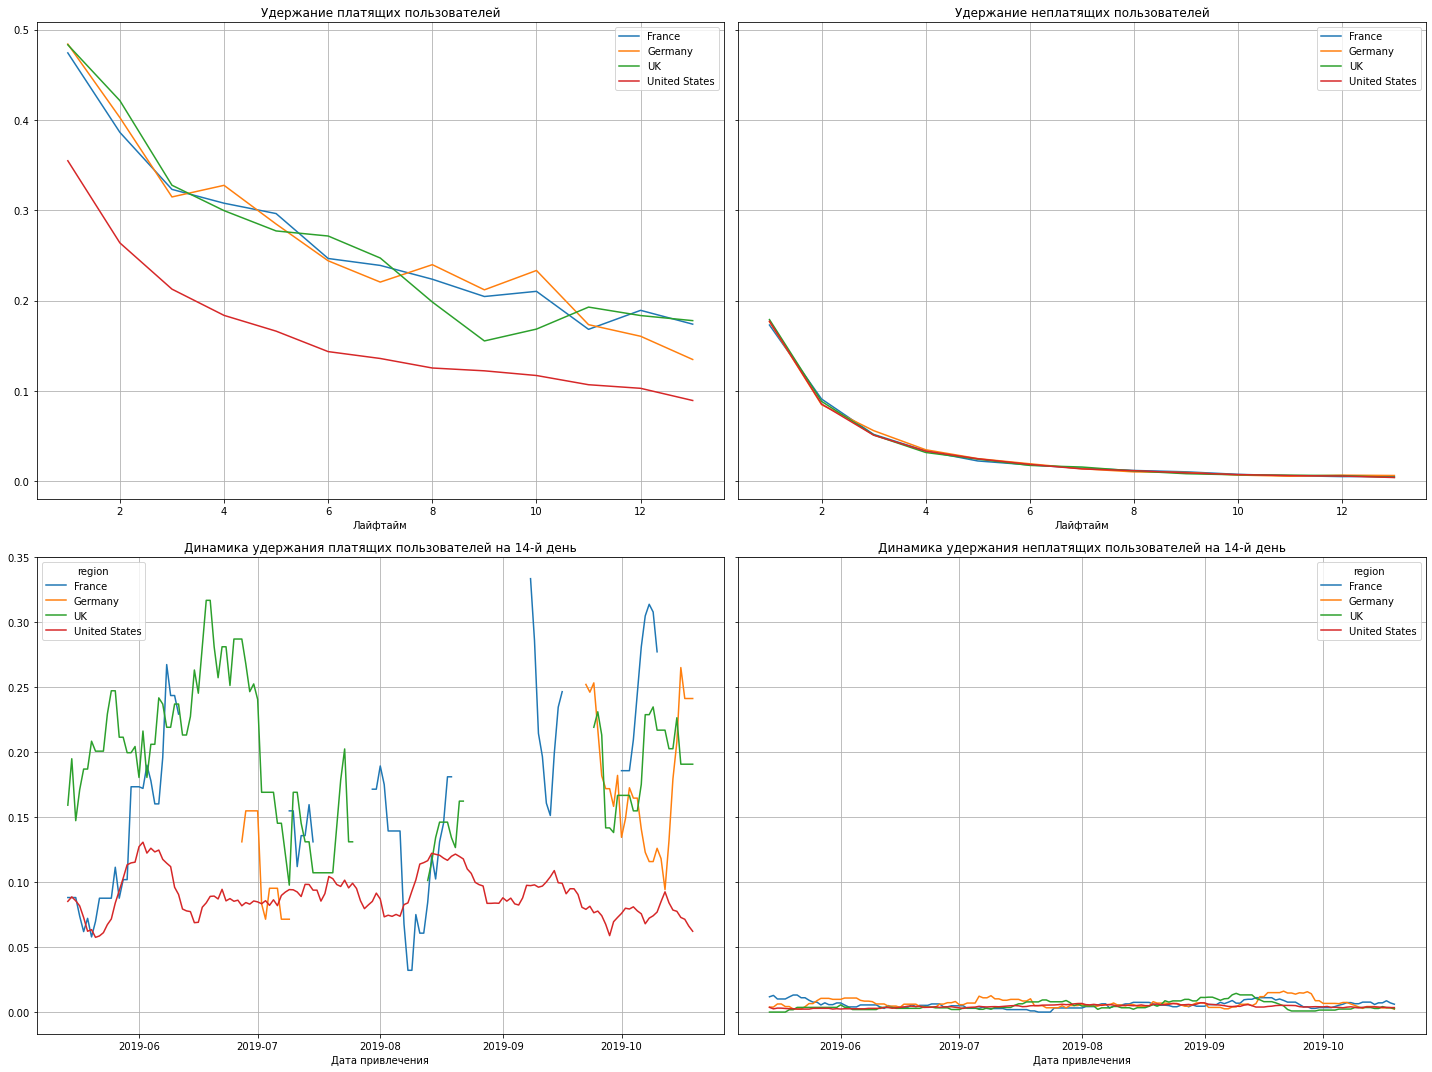

In [56]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_organic_less, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14) 

Комментарий

- Удержание платных пользователей в регионе `United States` более низкое, но все же стабильное. Линии графика удержания для других стран прерываются, пользователи не доживают до 14 дня удержания. Хотя уровень удержания более высокий. 

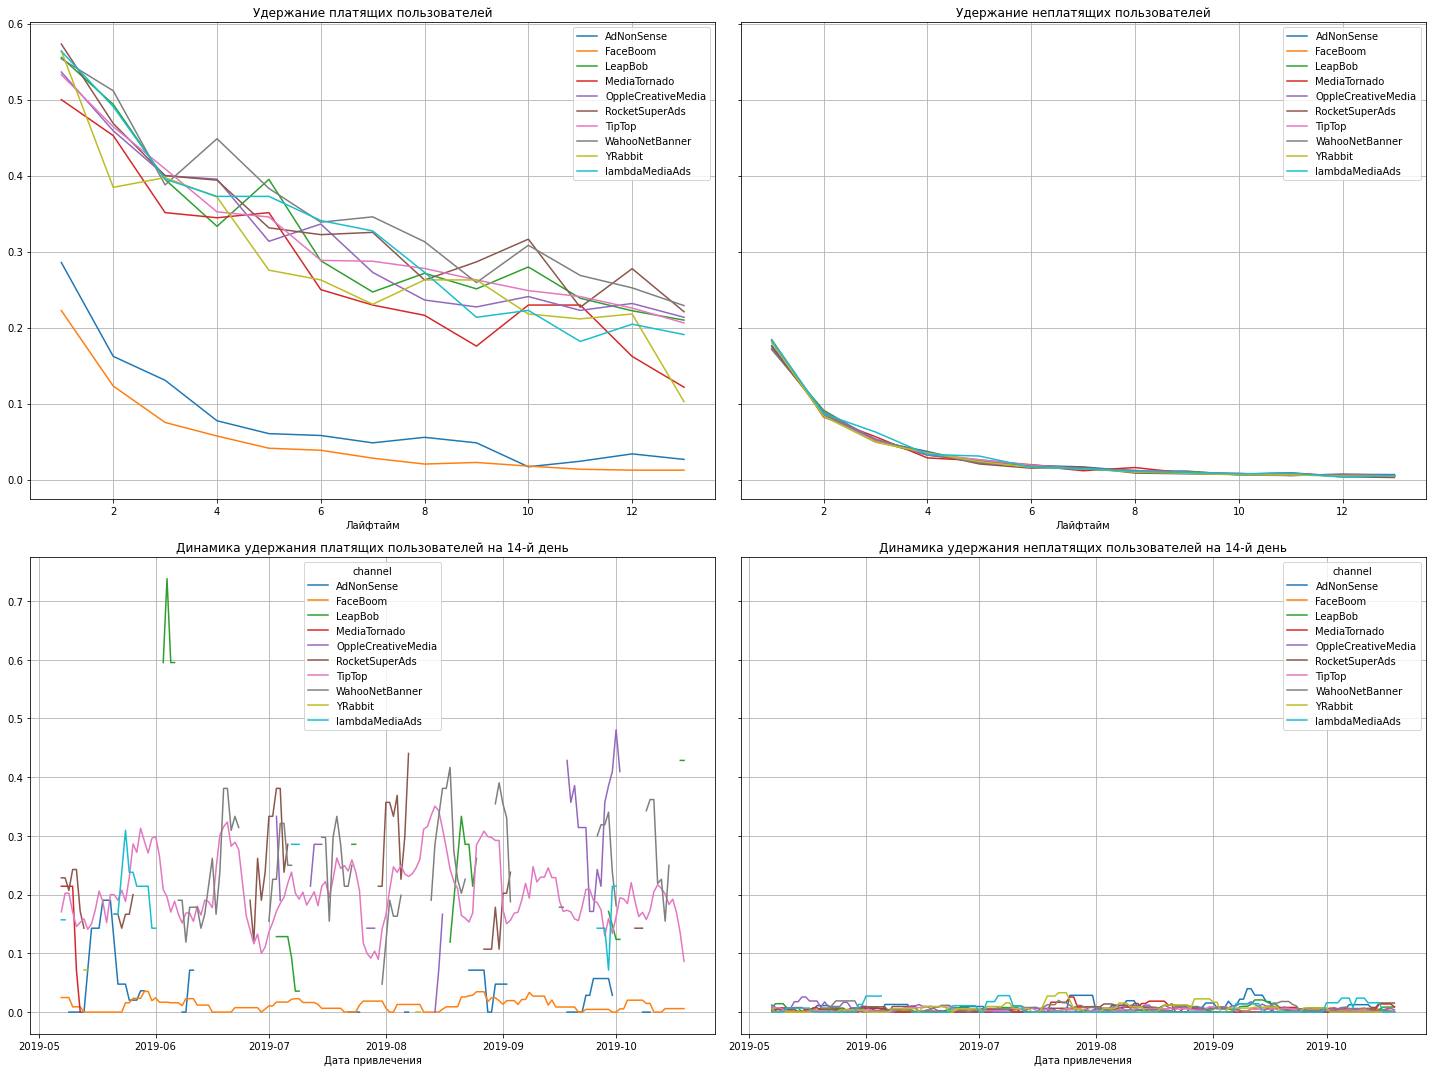

In [57]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_organic_less, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days, window=7) 

Комментарий

- Вот и причина убыточности рекламы для каналов `FaceBoom` и `AdNonSense` - низкое удержание, почти такое же как для неплатящих пользователей. 
- Возможно рекламируемый продукт не соответствует ожиданиям аудитории пользователей для этих каналов. Поэтому пользователи, заплатив, попробовав, не возвращаются.

## Вывод

Задачей данного исследования был ответ на вопрос бизнеса - почему, несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

Для анализа были предоставлены данные периода с 1 мая по 27 октября 2019 года:
- лог сервера с данными о посещениях
- выгрузка покупок за период
- рекламные расходы

**На первом этапе** работы мы 

 - изучили данные
 - проверили на пропуски и дубликаты
 - привели к нужным типам
 - исправили названия колонок.

**На втором этапе** мы построили пользовательскте профили, используя функцию `get_profiles`

Используя таблицу профилей определили, что 
 - больше всего платных пользователей приходит из региона  `United States` и `Germany`
 - пользователи устройства `Mac` и `iPhone` самые платящие клиенты
 - через канал `FaceBoom`, `AdNonSense`, `lambdaMediaAds` и `TipTop` приходит большая часть платящих пользователей

**На третьем этапе** изучили маркетинговые расходы. Выяснили как траты распределены по источникам. САС по всем каналам привлечения оказался стабильно ровным, за исключение канала `TipTop`. 

Стоимость рекламы в даном канале на порядок увеличивалась каждый месяц, задавая общий темп увеличения рекламных расходов.
 
**На четвертом этапе** мы исследовали окупаемость рекламы.  Построили графики LTV и ROI, а также графики динамики LTV, CAC и ROI, а потом эти же графики с разбивкой по рекламным каналам  странам и устройствам.

По первому графику  становилась ясно, что реклама не окупается и неуклонно дорожает. 

В графиках с разбивкой по каналам привлечения определили причина удорожания канал `TipTop`. 

В графиках с разбивкой по странам выяснили, что в регионе `United States` реклама не окупается и дорожает такими же темпами как и в канале `TipTop`. Можно предположить, что неоправданое удорожание происходит в данном канале и в данном регионе.

В графиках окупаемости рекламы с разбивкой по каналам мы выявили еще два канала привлечения, в которых реклама не окупается `FaceBoom` и `AdNonSense`, несмотря на то, что эти источники - лидеры по привлечению платных пользователей и стоимость рекламы для них стабильная. Причиной оказалось низкое удержание.

На графиках конверсии с разбивкой по регионам выявили, что конверсия пользователей американского региона намного выше европейского, но удержание ниже. Посмотрели отдельно каналы привлечения для американского и европейского регионов.

Отрицательное влияние на ситуацию в `United States` оказывают канал `TipTop` с высокими затратами и `FaceBoom` с низким удержанием. 
Не все каналы убыточниы, есть и прибыльные. Лучший по прибыльности `YRabbit`, у каналов `MediaTornado и RocketSuperAds` тоже хорошие показатели

В странах европейского региона реклама не окупается только на `AdNonSense` из-за низкого удержания, также затраты на этот канал выше, чем в других источниках.
Самый удачный канал для размещения рекламы `lambdaMediaAds`, но у него самое маленькое число пользователей.
Реклама на `LeapBob, OppleCreativeMedia, WahooNetBanner` также окупает себя, и они отличаются большим числом пользователей

Изучив графики конверсии и удержания с разбивкой по устройствам, отметим, что графики конверсии и удержания примерно одинаковые для всех устройств. Приложение хорошо сделано технически и работает без ошибок.

 
*Таким образом, можно выделить моменты, которые негативно влияют на окупаемость*
 
 
  - высокими темпами растущие расходы на рекламу в канале `TipTop` для региона `United States`.
  
  - низкое удержание для каналов `FaceBoom` в американском регионе и `AdNonSense` в европейском регионе.
  

*При анализе графиков окупаемости рекламы мы выявили, не только проблемные каналы привлечения пользователей, но и прибыльные*

   - В `United States` реклама размещена на пяти рекламных каналах.И три из них с успехом окупаются Лучший по прибыльности `YRabbit`, у каналов `MediaTornado и RocketSuperAds` тоже хорошие показатели.
   
   
   - В европейском регионе только один убыточный канал. Реклама в остальных приносит прибыль. Хорошую динамику окупаемости показывает канал `lambdaMediaAds` и каналы `LeapBob, OppleCreativeMedia, WahooNetBanner` с большим числом пользователей.
  
 
